# A Brief Overview of ANN

Open in Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/ts2024/blob/main/09-ANN.ipynb)

## Introduction

Until now he have studied the ARIMA class of models for time series forecasting. In this notebook we will show how artificial neural networks (ANN) can be used for time series forecasting. For a demonstration, we will use the `pytorch` library to implement a couple of simple neural networks for time series forecasting.

Before we turn to time series modeling, let's briefly discuss the basics of ANN for regression and we will start with the linear regression model that we studied in econometrics.

## Linear Regression

In linear regression we have a set of predictor variables $x_1$, $x_2$, ..., $x_p$ and a target variable $y$. We try to approximate $y$ for a set of $n$ observations. 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import torch


dt = pd.DataFrame({
    'x1': np.random.randn(100),
    'x2': np.random.randn(100),
})

dt["y"] = 5 + 2 * dt["x1"] - 3 * dt["x1"]**2 + 3 * dt["x2"] + np.random.randn(dt.shape[0])

dt = dt.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

dt.head()

,x1,x2,y
0,0.447393,0.540039,0.876781
1,0.890428,0.267863,0.348864
2,0.377259,0.227443,0.536045
3,0.789150,0.369175,0.664647
4,0.682537,0.471590,0.786174


In [3]:
dt.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.502104,0.438072,0.627362
std,0.241410,0.173276,0.228197
min,0.000000,0.000000,0.000000
25%,0.327481,0.303858,0.489092
50%,0.500532,0.451607,0.692972
75%,0.678787,0.546496,0.786789
max,1.000000,1.000000,1.000000


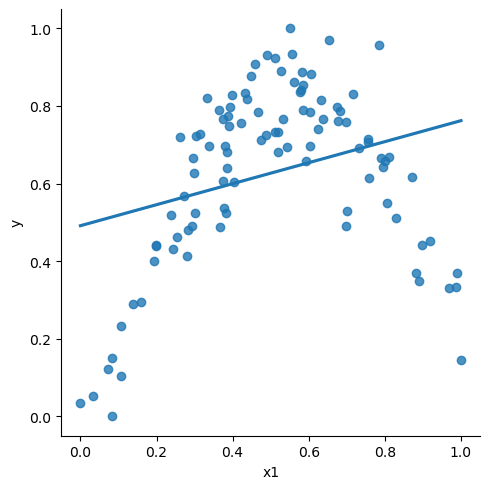

In [4]:
# Plot x1 and y and overlay the regression line

sns.lmplot(x='x1', y='y', data=dt, ci=None)
plt.show()

In econometrics we have written the linear regression model as for each observation $i = 1,\ldots,n$:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i
$$

Where $\beta_0$ is the intercept, $\beta_1, \ldots, \beta_p$ are the coefficients of the predictors, and $\epsilon_i$ is the error term for observation $i$. We can also write it more compactly as:

$$
y = X\beta + \epsilon
$$

Where $y$ is a vector of length $n$ and $\beta_0$ and $\beta_1$ are scalar parameters to be estimated, $x_1$ is a vector of length $n$, and $\epsilon$ is a vector of error terms of the same length. We can try to find the best values of $\beta_0$ and $\beta_1$ so that the predicted values of $y$ are as close as possible to the actual values of $y$.

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i}
$$

or 

$$
\hat{y} = X\hat{\beta}
$$

in matrix form. Here $\hat{y}$ is the predicted value of $y$ and $\hat{\beta}$ is the estimated vector of parameters.

If we are looking for "best" values of $\beta$ we must specify what good and bad means and this is the role of the loss function. The most common loss function for regression is the mean squared error (MSE) which is defined as:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

So the goal is to find the values of $\beta$ that minimize the MSE. We have actually done this in econometrics using the OLS method which resulted in the following formula for $\hat{\beta}$:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

where $X^T$ is the transpose of $X$ and $(X^TX)^{-1}$ is the inverse of the matrix product of $X^T$ and $X$.


In [5]:
# The first ten rows of the data

dt.head(n = 10)

,x1,x2,y
0,0.447393,0.540039,0.876781
1,0.890428,0.267863,0.348864
2,0.377259,0.227443,0.536045
3,0.789150,0.369175,0.664647
4,0.682537,0.471590,0.786174
5,0.732273,0.411387,0.691817
6,0.652703,0.751185,0.969359
7,0.107378,0.453059,0.233121
8,0.420651,0.508406,0.755711
9,0.373464,0.511168,0.767287


In [6]:

y, X = dmatrices('y ~ x1', dt[:10])

print("The feature matrix X is:")
print(X)

# Initialize the beta vector

beta = np.array([0.1, 0.1])
print("The beta1 vector is:")
print(beta)

y_hat = X.dot(beta)

print("The predicted values are:")

print(y_hat)

The feature matrix X is:
[[1.         0.44739282]
 [1.         0.89042762]
 [1.         0.37725865]
 [1.         0.78915036]
 [1.         0.68253661]
 [1.         0.73227296]
 [1.         0.652703  ]
 [1.         0.10737813]
 [1.         0.42065122]
 [1.         0.37346395]]
The beta1 vector is:
[0.1 0.1]
The predicted values are:
[0.14473928 0.18904276 0.13772586 0.17891504 0.16825366 0.1732273
 0.1652703  0.11073781 0.14206512 0.1373464 ]


In [7]:
# Calculate the residuals

residuals = y.squeeze() - y_hat

print("The residuals are:")
print(residuals)

print("The mean squared error is:", np.mean(residuals**2))

The residuals are:
[0.7320413  0.15982109 0.398319   0.48573217 0.61792    0.51858976
 0.80408886 0.12238349 0.61364605 0.62994092]
The mean squared error is: 0.3041705133541468


In [8]:
# We can find the optimal beta values by minimizing the mean squared error

from scipy.optimize import minimize

def mse(beta, X, y):
    y_hat = X.dot(beta)
    residuals = y.squeeze() - y_hat
    return np.mean(residuals**2)

result = minimize(mse, beta, args=(X, y))
print("The optimal beta values are:")
print(result.x)

The optimal beta values are:
[0.55071343 0.20512032]


In [9]:
# Or by using a dedicated library (similar to the lm function in R)

import statsmodels.api as sm

model = sm.OLS(y, X)

result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.3854
Date:                Fri, 10 Jan 2025   Prob (F-statistic):              0.552
Time:                        11:55:40   Log-Likelihood:                 1.2849
No. Observations:                  10   AIC:                             1.430
Df Residuals:                       8   BIC:                             2.035
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5507      0.196      2.812      0.0

/home/amarov/miniconda3/envs/ts2024/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Gradient Descent

There is also a more general way to find the best values of $\beta$ and that is by using the gradient descent algorithm. The idea is to start with some initial values of $\beta$ and then iteratively update the values of $\beta$ in the direction of the negative gradient of the loss function. The gradient of the loss function is the vector of partial derivatives of the loss function with respect to each parameter.

Consider first a very simple function of one variable:

$$
f(x) = x^2 - 2x + 1
$$

Its derivative is:

$$
f'(x) = 2x - 2
$$

and its minimum is at $x = -1$ (where the derivative is zero). We can find this minimum by starting at some initial value of $x$ and then iteratively updating $x$ in the direction of the negative gradient of $f(x)$:

$$
x_{t+1} = x_t - \eta f'(x_t)
$$

where $\eta$ a parameter that controls the speed of learning.


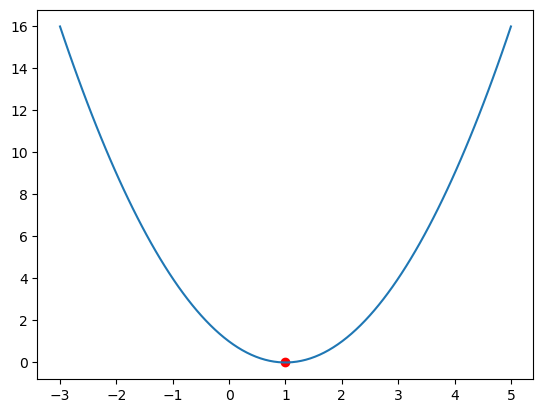

In [10]:
# Plot the minimum of the function

x = np.linspace(-3, 5, 100)

y = x**2 - 2 * x + 1

plt.plot(x, y)
plt.scatter(1, 0, color='red')
plt.show()


Step 0 x: 4 y: 9 gradient: 6
Step 1 x: 3.4 y: 5.759999999999999 gradient: 4.8
Step 2 x: 2.92 y: 3.686399999999999 gradient: 3.84
Step 3 x: 2.536 y: 2.3592960000000005 gradient: 3.072
Step 4 x: 2.2288 y: 1.5099494400000006 gradient: 2.4576000000000002
Step 5 x: 1.9830400000000001 y: 0.9663676416000002 gradient: 1.9660800000000003
Step 6 x: 1.786432 y: 0.6184752906240001 gradient: 1.572864
Step 7 x: 1.6291456 y: 0.3958241859993601 gradient: 1.2582912
Step 8 x: 1.50331648 y: 0.2533274790395903 gradient: 1.0066329600000001
Step 9 x: 1.402653184 y: 0.16212958658533783 gradient: 0.8053063680000001


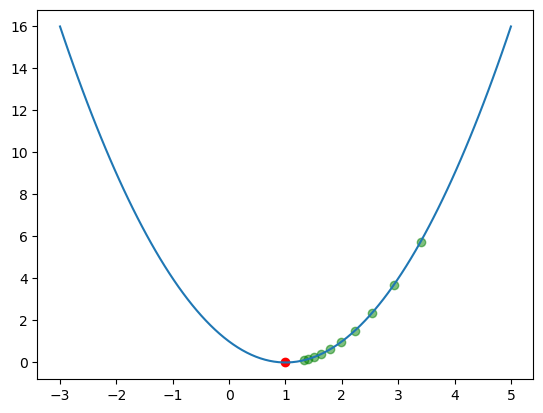

In [11]:
# Plot the gradient descent steps

x = np.linspace(-3, 5, 100)

y = x**2 - 2 * x + 1
d_y = 2 * x - 2

plt.plot(x, y)
plt.scatter(1, 0, color='red')

x = 4

for i in range(10):
    print("Step", i, "x:", x, "y:", x**2 - 2 * x + 1, "gradient:", 2 * x - 2)
    x = x - 0.1 * (2 * x - 2)    
    plt.scatter(x, x**2 - 2 * x + 1, color='green', alpha=0.5)
    

The same works for functions of multiple variables. The gradient of a function of multiple variables is a vector of partial derivatives. For example, consider the function:

$$
f(x_1, x_2) = x_1^2 + x_2^2
$$

Its gradient is:

$$
\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix}
$$

and its minimum is at $x_1 = 0$ and $x_2 = 0$. We can find this minimum by starting at some initial values of $x_1$ and $x_2$ and then iteratively updating $x_1$ and $x_2$ in the direction of the negative gradient of $f(x_1, x_2)$:

$$
x_{1,t+1} = x_{1,t} - \eta \frac{\partial f}{\partial x_1}
$$

$$
x_{2,t+1} = x_{2,t} - \eta \frac{\partial f}{\partial x_2}
$$

where $\eta$ a parameter that controls the speed of learning.

Step 0 x1: 4 x2: 4 f: 32 gradient: [8 8]
Step 1 x1: 3.2 x2: 3.2 f: 20.480000000000004 gradient: [6.4 6.4]
Step 2 x1: 2.56 x2: 2.56 f: 13.1072 gradient: [5.12 5.12]
Step 3 x1: 2.048 x2: 2.048 f: 8.388608 gradient: [4.096 4.096]
Step 4 x1: 1.6384 x2: 1.6384 f: 5.36870912 gradient: [3.2768 3.2768]
Step 5 x1: 1.31072 x2: 1.31072 f: 3.4359738368000006 gradient: [2.62144 2.62144]
Step 6 x1: 1.0485760000000002 x2: 1.0485760000000002 f: 2.199023255552001 gradient: [2.097152 2.097152]
Step 7 x1: 0.8388608000000002 x2: 0.8388608000000002 f: 1.4073748835532807 gradient: [1.6777216 1.6777216]
Step 8 x1: 0.6710886400000001 x2: 0.6710886400000001 f: 0.9007199254740995 gradient: [1.34217728 1.34217728]
Step 9 x1: 0.5368709120000001 x2: 0.5368709120000001 f: 0.5764607523034238 gradient: [1.07374182 1.07374182]


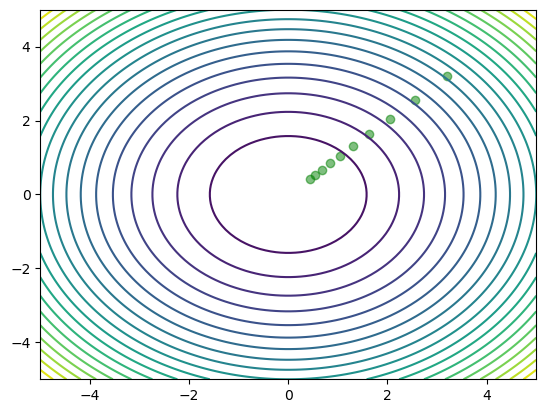

In [12]:
# Plot the steps of the gradient descent algorithm for the function of two variables

def f(x1, x2):
    return x1**2 + x2**2

def grad_f(x1, x2):
    return np.array([2 * x1, 2 * x2])

x1 = 4
x2 = 4

for i in range(10):
    print("Step", i, "x1:", x1, "x2:", x2, "f:", f(x1, x2), "gradient:", grad_f(x1, x2))
    x1 = x1 - 0.1 * grad_f(x1, x2)[0]
    x2 = x2 - 0.1 * grad_f(x1, x2)[1]
    plt.scatter(x1, x2, color='green', alpha=0.5)

# Plot the function as countour plot

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)

X1, X2 = np.meshgrid(x1, x2)

Y = X1**2 + X2**2

plt.contour(X1, X2, Y, levels=20)


## The Linear Regression as a Neural Network

Artificial neural networks are inspired by the way the human brain works and are a network of interconnected nodes (neurons) that are organized in layers. The simplest neural network is the perceptron which consists of a single neuron.

![Perceptron with a single input](./figures/ANN/perceptron-single-input.png)

![Perceptron with two inputs](./figures/ANN/perceptron-two-inputs.png)

![Perceptron with multiple inputs](./figures/ANN/perceptron-multiple-inputs.png)

The prediction of the perceptron is simply the weighted sum of the inputs:

$$
\hat{y} = b_1 + w_1 x_1 + w_2 x_2 + \ldots + w_p x_p
$$

where $b_1$ is the bias term, $w_1, \ldots, w_p$ are the weights of the inputs, and $x_1, \ldots, x_p$ are the inputs. The perceptron can be seen as a linear regression model with a single neuron.

Note that the language here differs from the econometrics language. When we talk of bias in econometrics we mean a systematic error in the model. In neural networks, the bias is a parameter just the constant in the linear regression model.

The MSE loss function for this model is:

$$
\text{MSE}(b, w_1, w_2) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


Taking MSE as the loss function, we can find the update rule for the weights and the bias.


$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial b} & = - \frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial b} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial b} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \\
\end{align*}
$$

$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_1} & = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial w_1} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial w_1} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) x_{1,i} \\
\end{align*}
$$

$$
\begin{align*}
\frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_2} & = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial \hat{y}_i}{\partial w_2} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) \frac{\partial (b + w_1 x_{1,i} + w_2 x_{2,i})}{\partial w_2} \\
& = -\frac{1}{n} \sum_{i=1}^n 2(y_i - \hat{y}_i) x_{2,i} \\
\end{align*}
$$

So given a learning rate $\eta$, we can update the weights and the bias as follows:

$$
b_{t+1} = b_t - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial b}
$$

$$
w_{1,t+1} = w_{1,t} - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_1}
$$

$$
w_{2,t+1} = w_{2,t} - \eta \frac{\partial \text{MSE}(b, w_1, w_2)}{\partial w_2}
$$


In [28]:
b = 0.001
w1 = 0.02
w2 = -0.01
learning_rate = 0.05

for i in range(5000):
    y_hat = b + w1 * dt["x1"] + w2 * dt["x2"]
    residuals = dt["y"] - y_hat

    # Update 
    b = b - learning_rate * np.mean(- 2 * residuals)
    w1 = w1 - learning_rate * np.mean(- 2 * residuals * dt["x1"])
    w2 = w2 - learning_rate * np.mean(- 2 * residuals * dt["x2"])

    if i % 500 == 0:    
        loss = np.mean(residuals**2)
        print("Step", i, "loss:", loss, "b:", b, "w1:", w1, "w2:", w2)


Step 0 loss: 0.43664603540121 b: 0.06307001671705141 w1: 0.05261688189900848 w2: 0.01933691337712954
Step 500 loss: 0.03422531624774048 b: 0.2829141894894835 w1: 0.21736807705529565 w2: 0.5407137099288534
Step 1000 loss: 0.033667839831813096 b: 0.2371853162449137 w1: 0.2179573259127061 w2: 0.6419242653840384
Step 1500 loss: 0.033621330557648293 b: 0.22363117952876083 w1: 0.21893052176742425 w2: 0.6709906075995544
Step 2000 loss: 0.03361744365955756 b: 0.21968062948757128 w1: 0.21928851051908102 w2: 0.6793755910800008
Step 2500 loss: 0.03361711876037317 b: 0.21853541440952018 w1: 0.2193993242609556 w2: 0.6817980735447018
Step 3000 loss: 0.03361709160204636 b: 0.21820402066334127 w1: 0.21943206053666722 w2: 0.6824982909953096
Step 3500 loss: 0.0336170893318764 b: 0.2181081805655044 w1: 0.21944159183832296 w2: 0.6827007214523763
Step 4000 loss: 0.03361708914211239 b: 0.21808046866521555 w1: 0.21944435388157907 w2: 0.6827592465441412
Step 4500 loss: 0.03361708912624998 b: 0.218072456356286

In [20]:
# We can obtain the same result using OLS

y, X = dmatrices('y ~ x1 + x2', dt)

model = sm.OLS(y, X)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     25.88
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.86e-10
Time:                        11:59:03   Log-Likelihood:                 27.742
No. Observations:                 100   AIC:                            -49.48
Df Residuals:                      97   BIC:                            -41.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2181      0.061      3.561      0.0

In [16]:
# Torch model for the linear regression

import torch

X = torch.tensor(dt[["x1"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

linmod = torch.nn.Linear(1, 1)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(linmod.parameters(), lr=0.01)

for i in range(400):
    optimizer.zero_grad()
    
    y_hat = linmod(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 10 == 0:
        print("Epoch", i, "Loss:", loss.item())

print("The beta values are:")
print(linmod.weight.detach().numpy())

# The bias term

print("The bias term is:")
print(linmod.bias.detach().numpy())

Epoch 0 Loss: 2.4268624782562256
Epoch 10 Loss: 1.4753978252410889
Epoch 20 Loss: 0.9052435159683228
Epoch 30 Loss: 0.5635697245597839
Epoch 40 Loss: 0.35880085825920105
Epoch 50 Loss: 0.23606547713279724
Epoch 60 Loss: 0.16248497366905212
Epoch 70 Loss: 0.11835844069719315
Epoch 80 Loss: 0.09188128262758255
Epoch 90 Loss: 0.07598020136356354
Epoch 100 Loss: 0.06641688942909241
Epoch 110 Loss: 0.06065181642770767
Epoch 120 Loss: 0.05716324225068092
Epoch 130 Loss: 0.05503935366868973
Epoch 140 Loss: 0.05373377725481987
Epoch 150 Loss: 0.05291913449764252
Epoch 160 Loss: 0.05239924415946007
Epoch 170 Loss: 0.052056532353162766
Epoch 180 Loss: 0.05182056128978729
Epoch 190 Loss: 0.05164909362792969
Epoch 200 Loss: 0.0515168271958828
Epoch 210 Loss: 0.05140857771039009
Epoch 220 Loss: 0.051315244287252426
Epoch 230 Loss: 0.05123138427734375
Epoch 240 Loss: 0.05115367844700813
Epoch 250 Loss: 0.05108015984296799
Epoch 260 Loss: 0.0510096549987793
Epoch 270 Loss: 0.050941430032253265
Epoch 

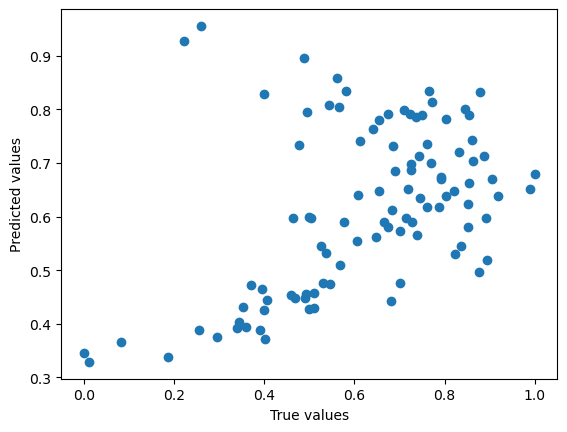

In [118]:
# It is useful to plot the predicted values against the true values

y_hat = linmod(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


Until now we have only changed the notation (instead of $\beta_1$ and $\beta_0$ we have $w_1, \ldots, w_1$ and $b_1$) but the model is the same. The only different thing is that we used gradient descent to find the best values of $w_1$ and $b_1$ instead of the OLS method.

Things get more interesting when we add more layers to the network.

![Neural network with two nodes in one hidden layer, single input](./figures/ANN/ann-hidden-layer-single-input.png)

The graphic visualizes the following mathematical model:

$$
\begin{align*}
z_1 &= b_1 + w^{h}_{1} x_1 \\
z_2 &= b_2 + w^{h}_{2} x_1 \\
h_1 &= \sigma(z_1) \\
h_2 &= \sigma(z_2) \\
\hat{y} &=  b + w^{o}_1 h_1 + w^{o}_2 h_2
\end{align*}
$$

where $z_1$ and $z_2$ are the weighted sums of the inputs, $h_1$ and $h_2$ are the outputs of the hidden layer, $\sigma$ is the activation function, and $\hat{y}$ is the prediction of the network. The activation function is a non-linear function that introduces non-linearity to the model. Here we have used the sigmoid function as the activation function. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

and maps the real numbers to the interval $(0, 1)$. The sigmoid function is used to introduce non-linearity to the model. If we used a linear activation function the model would be equivalent to a linear regression model.

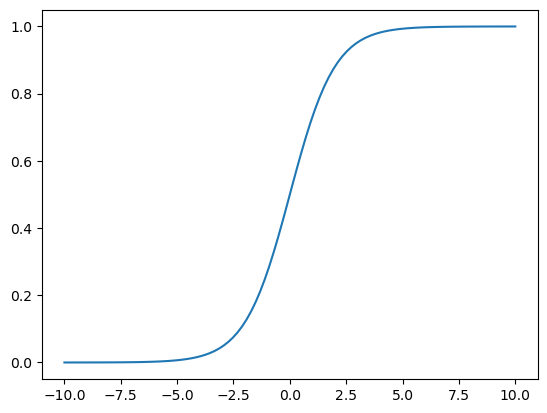

In [119]:
# Plot the sigmoid function

x = np.linspace(-10, 10, 100)

y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()


Epoch 0 Loss: 0.058987997472286224
Epoch 1000 Loss: 0.014202318154275417


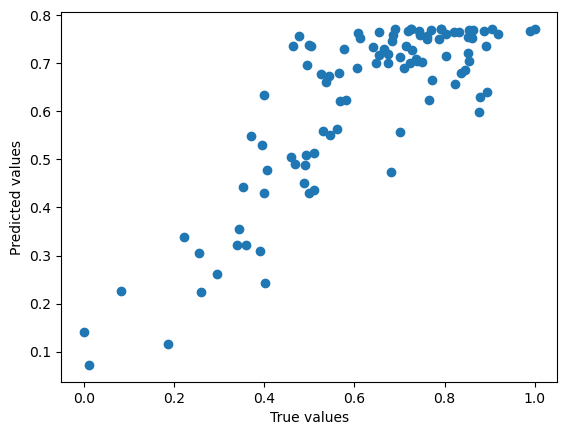

In [168]:
# Fit the model using pytorch

nn1 = torch.nn.Sequential(
    torch.nn.Linear(1, 9),
    torch.nn.Sigmoid(),
    torch.nn.Linear(9, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(nn1.parameters(), lr=0.01)

X = torch.tensor(dt[["x1"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

for i in range(1500):
    optimizer.zero_grad()
    
    y_hat = nn1(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 1000 == 0:
        print("Epoch", i, "Loss:", loss.item())

# Plot the predicted values against the true values

y_hat = nn1(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


In [164]:
# Print the weights and biases

print("The weights are:")
print(nn1[0].weight.detach().numpy())
print("The biases are:")
print(nn1[0].bias.detach().numpy())

print("The weights are:")
print(nn1[2].weight.detach().numpy())
print("The biases are:")
print(nn1[2].bias.detach().numpy())

The weights are:
[[-0.5069635]
 [ 9.822067 ]
 [ 6.1107917]
 [-0.8012252]
 [-1.4595551]
 [ 6.842906 ]
 [ 2.6828892]
 [-1.0488362]]
The biases are:
[ 0.70611465  1.2469362  -6.234843   -0.35926026  0.1900663   2.1820786
  0.53635     0.26960802]
The weights are:
[[-0.4930634   1.52056    -2.0486643  -0.5777411  -0.79893494  0.6027665
   0.3747458  -0.8099324 ]]
The biases are:
[-0.46822527]


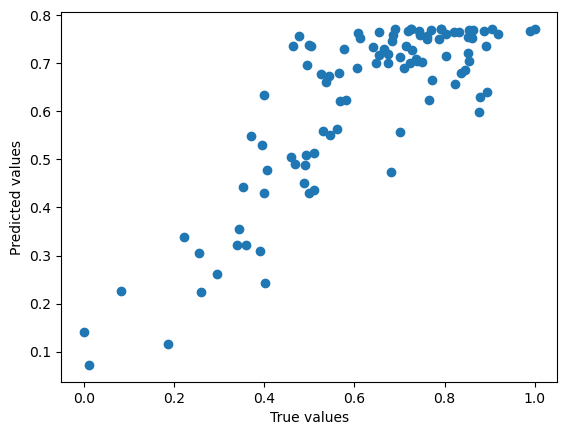

In [169]:
# Plot the predicted values against the true values

y_hat = nn1(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


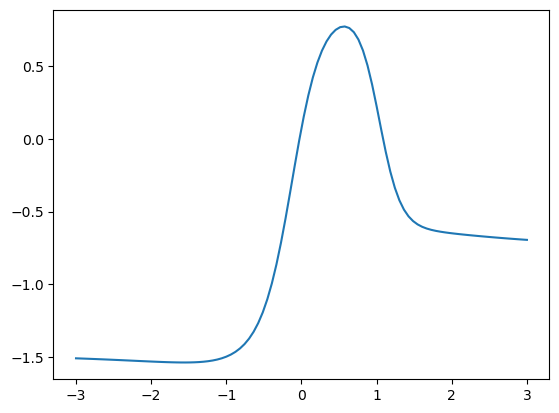

In [171]:
# Plot the prediction of the model

x = np.linspace(-3, 3, 100)

X = torch.tensor(x.reshape(-1, 1), dtype=torch.float32)

y = nn1(X).detach().numpy()

plt.plot(x, y)
plt.show()


We can extend the mathematical model to handle two or more inputs:

![One hidden layer, two inputs](./figures/ANN/ann-hidden-layer-two-inputs.png)

Epoch 0 Loss: 1.9208155870437622
Epoch 1000 Loss: 0.01324398536235094


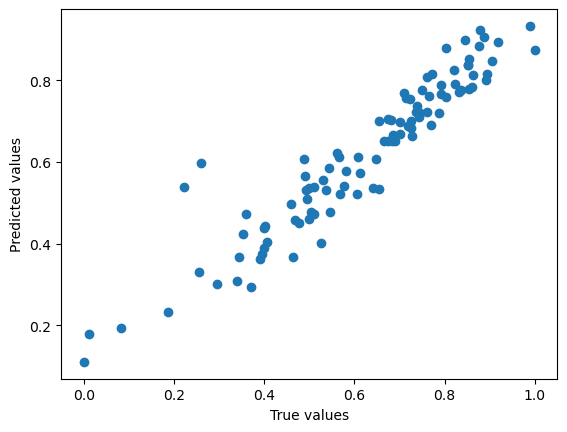

In [173]:
# Fit the model using pytorch

nn2 = torch.nn.Sequential(
    torch.nn.Linear(2, 9),
    torch.nn.Sigmoid(),
    torch.nn.Linear(9, 1)
)

criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(nn2.parameters(), lr=0.01)

X = torch.tensor(dt[["x1", "x2"]].values, dtype=torch.float32)
y = torch.tensor(dt["y"].values, dtype=torch.float32)

for i in range(1500):
    optimizer.zero_grad()
    
    y_hat = nn2(X)
    
    loss = criterion(y_hat, y.view(-1, 1))
    
    loss.backward()
    
    optimizer.step()

    if i % 1000 == 0:
        print("Epoch", i, "Loss:", loss.item())

# Plot the predicted values against the true values

y_hat = nn2(X).detach().numpy()

plt.scatter(dt["y"], y_hat)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

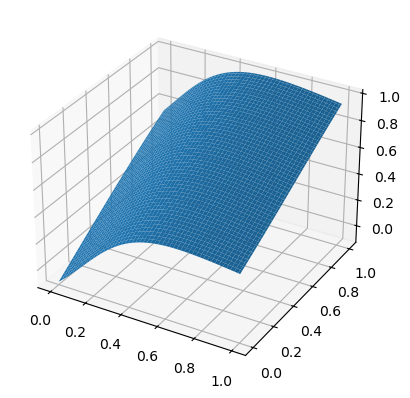

In [175]:
# Plot the prediction of the model for the two features

x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

X1, X2 = np.meshgrid(x1, x2)

X = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

y = nn2(X).detach().numpy().reshape(100, 100)

# Visualize in 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y)
plt.show()


## Time series forecasting with ANN

We can use the same neural network architecture that we used for regression for time series forecasting. The only difference is that we use a time series as input instead of a set of predictors.

Let's say that we want to forecast the value of a time series $y_t$ at time $t$ using the values of the time series at times $t-1, t-2, \ldots, t-p$. We can use the following neural network architecture:
